In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Summary of Problem

You, a hard-driving sheep farmer, are tucked into the southeast corner of your square, fenced-in sheep paddock. There are two gates equidistant from you: one at the southwest corner and one at the northeast corner. An angry, recalcitrant ram enters the paddock from the southwest gate and charges directly at you at a constant speed. You run — obviously! — at a constant speed along the eastern fence toward the northeast gate in an attempt to escape. The ram keeps charging, always directly at you.

How much faster than you does the ram have to run so that he catches you just as you reach the gate?

In [2]:
def me(t):
    return sp.array([1, t])

def bulldist(t, d):
    x = me(t) - d
    dist = sp.linalg.norm(x)
    xhat = x / dist
    return x, dist, xhat

def vbull(t, d, speed):
    x, dist, xhat = bulldist(t, d)
    return speed * xhat

In [3]:
BULLSTART = sp.array([0, 0])
def run_forrest_run(speed, stepsize=.005, maxtime=10, distThresh=0.005):
    r = sp.integrate.ode(vbull)
    r.set_initial_value(BULLSTART, 0).set_f_params(speed)
    hist = [[0, BULLSTART, me(0)]]
    while r.successful() and r.t < maxtime:
        tnext = r.t + stepsize
        dnext = r.integrate(tnext)
        x, dist, xhat = bulldist(tnext, dnext)
        hist.append([tnext, dnext, me(tnext)])
        if dist < distThresh:
            break
    return hist

In [4]:
def bullpath(speed, stepsize=.005, maxtime=10, distThresh=0.005):
    return sp.array([_[1] for _ in run_forrest_run(speed=speed, stepsize=stepsize, maxtime=maxtime, distThresh=distThresh)])

In [16]:
def bullplot(speed, stepsize=.005, maxtime=10, distThresh=0.005, ax=None):
    bp = bullpath(speed=speed, stepsize=stepsize, maxtime=maxtime, distThresh=distThresh)
    if ax is None:
        f = plt.figure()
        ax = f.add_subplot(111)
    a = ax.plot(bp[:, 0], bp[:, 1], label='speed {:.02f}'.format(speed))
    ax.legend()
    ax.set_xlim(0, 1)
    ylim = ax.get_ylim()
    ymax = max(ylim[1], 1)
    ax.set_ylim(0, ymax)

/Users/zach.lamberty/anaconda2/envs/bullshit3/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


<function __main__.bullplot>

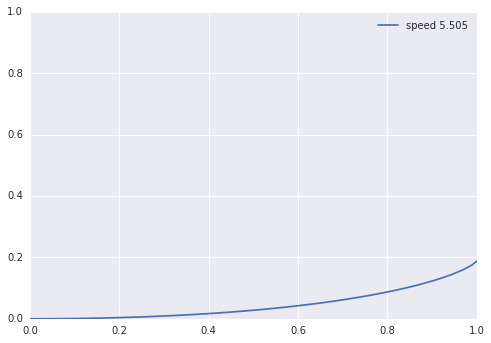

In [10]:
interact(bullplot, speed=(1.01, 10.00), stepsize=(.005, 0.9), maxtime=(1, 10), distThresh=(0.001, 0.100))

In [6]:
def time_to_live(speed):
    """given a speed a ram is running, how long until it reaches me"""
    return run_forrest_run(speed=speed)[-1][0]

In [7]:
def ramming_speed(speed):
    return 1.0 - time_to_live(speed)

In [8]:
v0 = 1.4
sp.optimize.root(ramming_speed, v0, tol=1e-8)

/Users/zach.lamberty/anaconda2/envs/bullshit3/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


    fjac: array([[ 1.]])
     fun: -6.6613381477509392e-16
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 27
     qtf: array([ -6.66133815e-16])
       r: array([ 0.])
  status: 5
 success: False
       x: array([ 1.61418414])

In [31]:
speeds = sp.arange(1.05, 2.05, .01)
times = sp.array([time_to_live(s) for s in speeds])

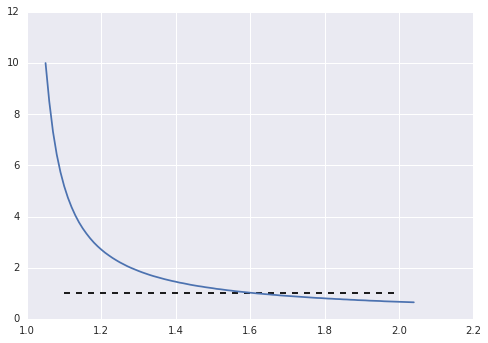

In [37]:
plt.plot(speeds, times)
plt.hlines(1, 1.1, 2, linestyle='--')